In [1]:
library(tidyr)
library(dplyr)
library(stringr)
library(ggplot2)
library(ComplexHeatmap)
library(cowplot)
library(here)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


here() starts at /Users/xiaoqin/Dropbox/TAPE LAB/Manuscripts/Qin & Ca

# Complex Heatmap (Figure S6C)

In [2]:
# ---
# Prepare dataframe
# ---
df <- read.csv(here("Figure6_S6", "Signal Perturbation", "output", "stem-score", "stemness-score_log2_by-condition_raw.csv"))

df <- df %>%
  arrange(factor(inhibitor, levels = c(
    "Ctrl",
    "CHIR99021",
    "ICG001",
    "SIS3",
    "CA3",
    "Dasatinib",
    "GDC0941",
    "Trametinib",
    "PF573228"
  ))) %>%
  arrange(factor(ligand, levels = c(
    "Ctrl",
    "EREG",
    "WNT3A",
    "TGFb1"
  ))) %>%
  arrange(factor(genotype,
    levels =
      c("WT", "A", "K", "AK")
  ))

head(df)


,replicate,X162Dy_LRIG1_1,X174Yb_Clusterin_1,pro_vs_rev,pro_vs_rev_log2,genotype,culture,ligand,inhibitor
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,2.794781,2.368777,1.595381,0.2705131,WT,WT_Ctrl-Ctrl,Ctrl,Ctrl
2,2,2.853235,2.409194,1.665896,0.3006516,WT,WT_Ctrl-Ctrl,Ctrl,Ctrl
3,3,2.852115,2.367558,1.718951,0.3252032,WT,WT_Ctrl-Ctrl,Ctrl,Ctrl
4,1,3.032565,2.090828,2.346353,0.6640670,WT,WT_Ctrl-CHIR99021,Ctrl,CHIR99021
5,2,2.956083,2.214709,2.118365,0.5151577,WT,WT_Ctrl-CHIR99021,Ctrl,CHIR99021
6,3,2.912400,2.047267,2.265082,0.6499306,WT,WT_Ctrl-CHIR99021,Ctrl,CHIR99021


,genotype,ligand,inhibitor
,<chr>,<chr>,<chr>
1,WT,Ctrl,Ctrl
2,WT,Ctrl,Ctrl
3,WT,Ctrl,Ctrl
4,WT,Ctrl,CHIR99021
5,WT,Ctrl,CHIR99021
6,WT,Ctrl,CHIR99021


,genotype,ligand,inhibitor,replicate,pro_vs_rev_log2
,<chr>,<chr>,<chr>,<int>,<dbl>
1,WT,Ctrl,Ctrl,1,0.2705131
2,WT,Ctrl,Ctrl,2,0.3006516
3,WT,Ctrl,Ctrl,3,0.3252032
4,WT,Ctrl,CHIR99021,1,0.6640670
5,WT,Ctrl,CHIR99021,2,0.5151577
6,WT,Ctrl,CHIR99021,3,0.6499306


ligand,inhibitor,replicate,WT,A,K,AK
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Ctrl,Ctrl,1,0.2705131,0.8527138,0.8285207,2.079792
Ctrl,Ctrl,2,0.3006516,0.7725990,0.7907896,1.862771
Ctrl,Ctrl,3,0.3252032,0.8072490,0.8097385,2.060517
Ctrl,CHIR99021,1,0.6640670,1.1397327,1.1881857,2.162565
Ctrl,CHIR99021,2,0.5151577,1.3103152,1.2003037,2.194816
Ctrl,CHIR99021,3,0.6499306,1.2709366,1.1865578,2.264072


1%        99% 
-0.9394878  2.1884274

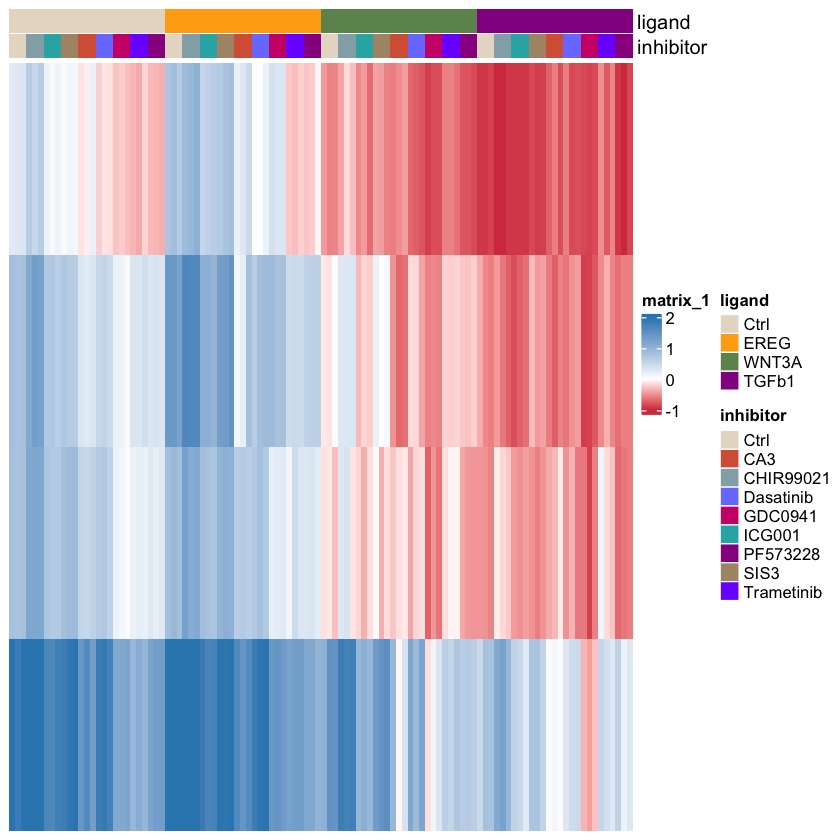

In [3]:
# ---
# Complex Heatmap
# ---

# Metadata
df_metadata <- df %>% select(genotype, ligand, inhibitor)
head(df_metadata)

# Useful columns
df_subset <- df %>%
  select(genotype, ligand, inhibitor, replicate, pro_vs_rev_log2)
head(df_subset)

# Long to wide transformation
df_subset_wide <- pivot_wider(df_subset, names_from = genotype, values_from = pro_vs_rev_log2)
head(df_subset_wide)
df_subset_wide_data <- df_subset_wide %>% select(WT, A, K, AK)

mat <- df_subset_wide_data %>%
  as.matrix() %>%
  t()
quantile(mat, c(0.01, 0.99)) # Determine the range of the colour scale
colour <- circlize::colorRamp2(c(-1, 0, 2), c("#D53E4F", "white", "#3288BD"))

ha <- HeatmapAnnotation(
  # genotype = factor(df_subset[, "genotype"], levels = c("WT", "A", "K", "AK")),
  ligand = factor(df_subset_wide$ligand, levels = c(
    "Ctrl",
    "EREG",
    "WNT3A",
    "TGFb1"
  )),
  inhibitor = factor(df_subset_wide$inhibitor, levels = c(
    "Ctrl",
    "CA3",
    "CHIR99021",
    "Dasatinib",
    "GDC0941",
    "ICG001",
    "PF573228",
    "SIS3",
    "Trametinib"
  )),
  col = list(
    ligand = c(
      "Ctrl" = "#E6DCCB",
      "EREG" = "#FEAA11",
      "WNT3A" = "#6E925E",
      "TGFb1" = "#932192"
    ),
    inhibitor = c(
      "Ctrl" = "#E6DCCB",
      "CA3" = "#D76144",
      "CHIR99021" = "#93ADB4",
      "ICG001" = "#2EB0B2",
      "Dasatinib" = "#7A80FF",
      "Trametinib" = "#7B00FF",
      "GDC0941" = "#CD0578",
      "PF573228" = "#990090",
      "SIS3" = "#AE9576"
    )
  )
  # show_legend = c(FALSE, FALSE, FALSE),
  # show_annotation_name = c(FALSE, FALSE, FALSE)
)
Heatmap(mat,
  cluster_rows = FALSE,
  cluster_columns = FALSE,
  col = colour,
  top_annotation = ha,
  show_row_names = FALSE
)

# Waterfall Plot (Figure 6F)

In [5]:
# ---
# Prepare dataframe
# ---
df <- read.csv(here("Figure6_S6", "Signal Perturbation", "output", "stem-score", "stemness-score_log2_by-condition.csv"))

df <- df %>%
  arrange(factor(inhibitor, levels = c(
    "Ctrl",
    "CHIR99021",
    "ICG001",
    "SIS3",
    "CA3",
    "Dasatinib",
    "GDC0941",
    "Trametinib",
    "PF573228"
  ))) %>%
  arrange(factor(ligand, levels = c(
    "Ctrl",
    "EREG",
    "WNT3A",
    "TGFb1"
  ))) %>%
  arrange(factor(genotype,
    levels =
      c("WT", "A", "K", "AK")
  ))

head(df)

,X162Dy_LRIG1_1,X174Yb_Clusterin_1,pro_vs_rev,pvr_log2_mean,pvr_log2_std,genotype,culture,ligand,inhibitor
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2.833377,2.381843,1.660076,0.298789297,0.02739259,WT,WT_Ctrl-Ctrl,Ctrl,Ctrl
2,2.967016,2.117601,2.243267,0.609718424,0.08219648,WT,WT_Ctrl-CHIR99021,Ctrl,CHIR99021
3,2.672668,2.491016,1.514007,0.120872039,0.05438583,WT,WT_Ctrl-ICG001,Ctrl,ICG001
4,2.758541,2.577435,1.394165,0.098571193,0.03705968,WT,WT_Ctrl-SIS3,Ctrl,SIS3
5,2.217143,2.210625,1.428139,-0.006513697,0.15388670,WT,WT_Ctrl-CA3,Ctrl,CA3
6,2.072804,2.314882,1.275785,-0.153236205,0.05318168,WT,WT_Ctrl-Dasatinib,Ctrl,Dasatinib


,genotype,ligand,inhibitor
,<chr>,<chr>,<chr>
1,WT,Ctrl,Ctrl
2,WT,Ctrl,CHIR99021
3,WT,Ctrl,ICG001
4,WT,Ctrl,SIS3
5,WT,Ctrl,CA3
6,WT,Ctrl,Dasatinib


,genotype,ligand,inhibitor,pvr_log2_mean,pvr_log2_std,culture
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,WT,Ctrl,Ctrl,0.298789297,0.02739259,WT_Ctrl-Ctrl
2,WT,Ctrl,CHIR99021,0.609718424,0.08219648,WT_Ctrl-CHIR99021
3,WT,Ctrl,ICG001,0.120872039,0.05438583,WT_Ctrl-ICG001
4,WT,Ctrl,SIS3,0.098571193,0.03705968,WT_Ctrl-SIS3
5,WT,Ctrl,CA3,-0.006513697,0.15388670,WT_Ctrl-CA3
6,WT,Ctrl,Dasatinib,-0.153236205,0.05318168,WT_Ctrl-Dasatinib


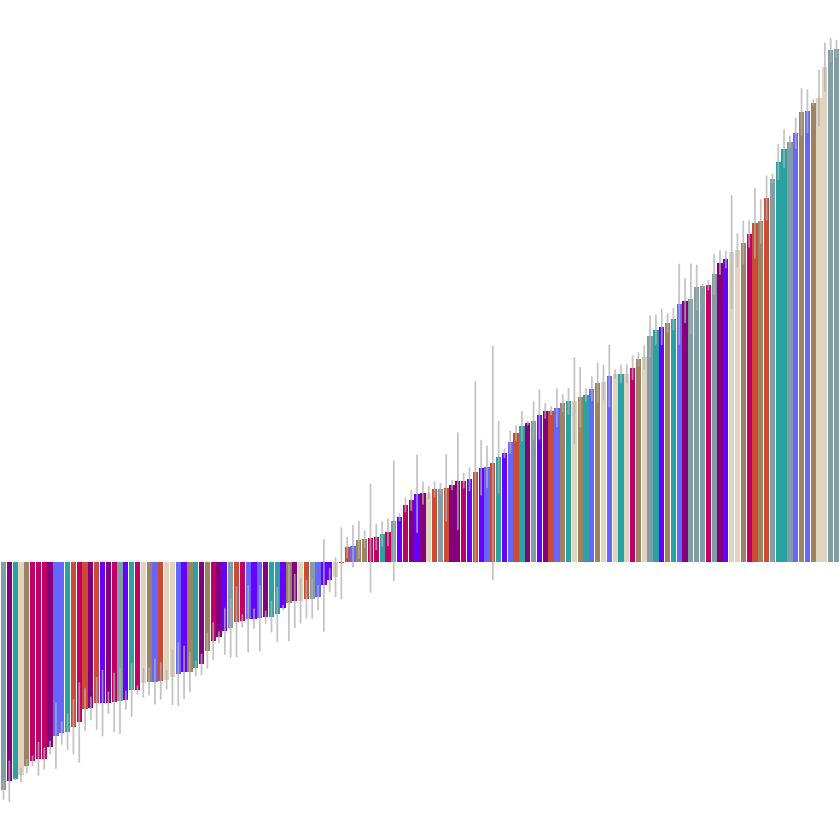

In [6]:
# Metadata
df_metadata <- df %>% select(genotype, ligand, inhibitor)
head(df_metadata)

# Useful columns
df_subset <- df %>%
  select(genotype, ligand, inhibitor, pvr_log2_mean, pvr_log2_std, culture, genotype)
head(df_subset)

# Inhibitor
ggplot(df_subset, aes(x = reorder(culture, pvr_log2_mean), y = pvr_log2_mean, fill = inhibitor)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymin = pvr_log2_mean - pvr_log2_std, ymax = pvr_log2_mean + pvr_log2_std),
    width = .05,
    color = "grey",
    alpha = 0.75,
    position = position_dodge(.9)
  ) +
  scale_fill_manual(values = c(
    "Ctrl" = "#E6DCCB",
    "CA3" = "#D76144",
    "CHIR99021" = "#93ADB4",
    "ICG001" = "#2EB0B2",
    "Dasatinib" = "#7A80FF",
    "Trametinib" = "#7B00FF",
    "GDC0941" = "#CD0578",
    "PF573228" = "#990090",
    "SIS3" = "#AE9576"
  )) +
  theme_nothing() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    # axis.line.x = element_blank(),
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.line.y = element_blank(),
    legend.position = "none",
    # plot.background = element_rect(colour = "black", fill = NA, size = 1)
  ) +
  labs(
    x = "Culture",
    y = "log2([LRIG1]/[CLU])",
    fill = "Genotype"
  )

## Colour Keys for Waterfall Plot

,genotype,ligand,inhibitor,pvr_log2_mean,pvr_log2_std,culture
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,WT,Ctrl,Ctrl,0.298789297,0.02739259,WT_Ctrl-Ctrl
2,WT,Ctrl,CHIR99021,0.609718424,0.08219648,WT_Ctrl-CHIR99021
3,WT,Ctrl,ICG001,0.120872039,0.05438583,WT_Ctrl-ICG001
4,WT,Ctrl,SIS3,0.098571193,0.03705968,WT_Ctrl-SIS3
5,WT,Ctrl,CA3,-0.006513697,0.15388670,WT_Ctrl-CA3
6,WT,Ctrl,Dasatinib,-0.153236205,0.05318168,WT_Ctrl-Dasatinib


1%       99% 
-0.942692  2.175611

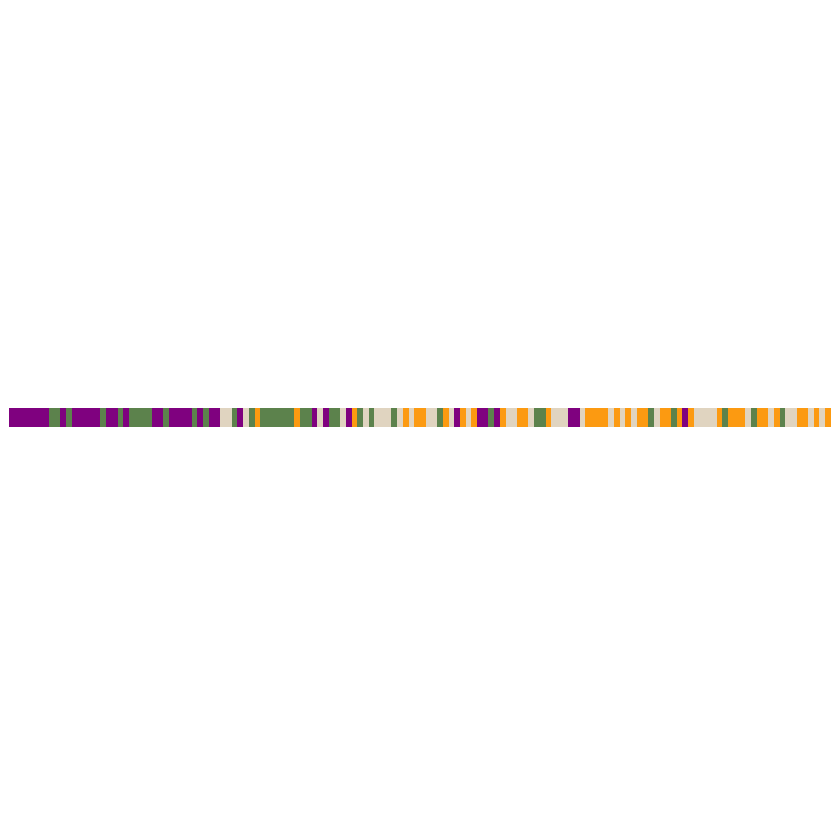

In [7]:
# Ligand

head(df_subset)
df_subset <- df_subset[order(df_subset$pvr_log2_mean), ]
df_subset_data <- df_subset %>% select(pvr_log2_mean)
mat <- df_subset_data %>%
  as.matrix() %>%
  t()
quantile(mat, c(0.01, 0.99)) # Determine the range of the colour scale
colour <- circlize::colorRamp2(c(-1, 0, 2), c("#D53E4F", "white", "#3288BD"))

ha <- HeatmapAnnotation(
  ligand = factor(df_subset$ligand, levels = c(
    "Ctrl",
    "EREG",
    "WNT3A",
    "TGFb1"
  )),
  col = list(
    ligand = c(
      "Ctrl" = "#E6DCCB",
      "EREG" = "#FEAA11",
      "WNT3A" = "#6E925E",
      "TGFb1" = "#932192"
    )
  ),
  show_legend = c(FALSE, FALSE, FALSE),
  show_annotation_name = c(FALSE, FALSE, FALSE),
  simple_anno_size = unit(0.4, "cm")
)
Heatmap(
  matrix(nrow = 0, ncol = ncol(mat)),
  col = colour,
  top_annotation = ha,
)

,genotype,ligand,inhibitor,pvr_log2_mean,pvr_log2_std,culture
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
29,WT,TGFb1,CHIR99021,-0.9851199,0.04066846,WT_TGFb1-CHIR99021
36,WT,TGFb1,PF573228,-0.9463567,0.08866838,WT_TGFb1-PF573228
30,WT,TGFb1,ICG001,-0.9378342,0.00487320,WT_TGFb1-ICG001
28,WT,TGFb1,Ctrl,-0.9197179,0.03107449,WT_TGFb1-Ctrl
31,WT,TGFb1,SIS3,-0.8813542,0.02965469,WT_TGFb1-SIS3
34,WT,TGFb1,GDC0941,-0.8574975,0.02138285,WT_TGFb1-GDC0941


1%       99% 
-0.942692  2.175611

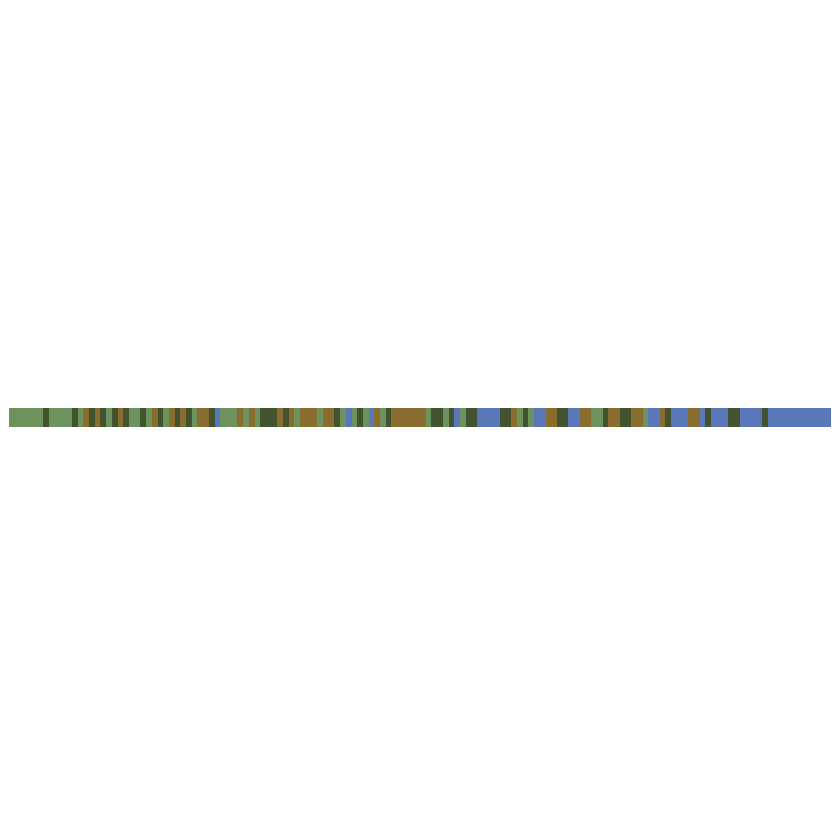

In [8]:
# Genotype
head(df_subset)
df_subset <- df_subset[order(df_subset$pvr_log2_mean), ]
df_subset_data <- df_subset %>% select(pvr_log2_mean)
mat <- df_subset_data %>%
  as.matrix() %>%
  t()
quantile(mat, c(0.01, 0.99)) # Determine the range of the colour scale
colour <- circlize::colorRamp2(c(-1, 0, 2), c("#D53E4F", "white", "#3288BD"))

ha <- HeatmapAnnotation(
  genotype = factor(df_subset$genotype, levels = c("WT", "A", "K", "AK")),
  col = list(
    genotype = c(
      "WT" = "#80A171",
      "A" = "#54653D",
      "K" = "#9B7F3C",
      "AK" = "#6C8DC6"
    )
  ),
  show_legend = c(FALSE, FALSE, FALSE),
  show_annotation_name = c(FALSE, FALSE, FALSE),
  simple_anno_size = unit(0.4, "cm")
)
Heatmap(
  matrix(nrow = 0, ncol = ncol(mat)),
  col = colour,
  top_annotation = ha,
)